In [1]:
import tensorflow as tf
tf.__version__
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")
import cv2
import numpy as np
from glob import glob
from models import Yolov4

In [2]:
yolo_model = Yolov4(class_name_path='../class_names/butelka_classes.txt')

Yolov4
(416, 416, 3)
Build model


2021-11-30 16:41:20.592509: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-30 16:41:20.607297: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-30 16:41:20.608412: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-30 16:41:20.629288: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-30 16:41:20.630650: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read f

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 416, 416, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 416, 416, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 416, 416, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 416, 416, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

Total params: 64,003,990
Trainable params: 63,937,686
Non-trainable params: 66,304
__________________________________________________________________________________________________
nms iou: 0.413 score: 0.3


In [3]:
yolo_model.load_model('wagi')

nms iou: 0.413 score: 0.3


In [62]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
from keras.models import load_model
img_classifier_width, img_classifier_height = 216, 384

In [5]:
class_names = ['brak', 'wada banderoli', 'wada nakretki', 'Ok nakrętka i banderola']

In [7]:
classifier = load_model('klasyfikator_nakretek.h5')

img shape:  (3840, 2160, 3)


2021-11-30 16:42:04.422711: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-30 16:42:07.074044: I tensorflow/stream_executor/cuda/cuda_dnn.cc:381] Loaded cuDNN version 8204


# of bboxes: 1


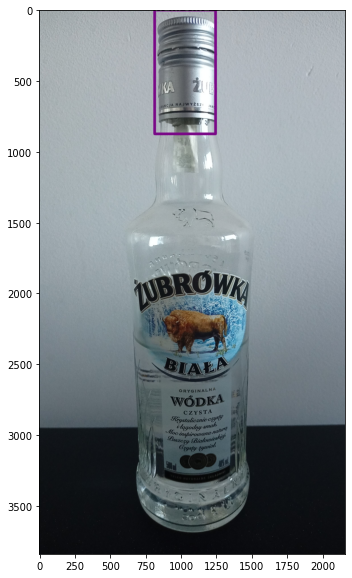

In [8]:
img_path = '../dataset/valid_images/IMG20211101140317_00.jpg'
img_width, img_height = 312, 416

In [111]:
def crop_roi(detections, orig_img):
    imgs = []
    for detection in detections.values:
        cropped_img = orig_img[detection[1]:detection[3], detection[0]:detection[2]]
        imgs.append(cropped_img)
    return imgs

In [80]:
def make_prediction(img, model, show_image = False):
    img = cv2.resize(img, (img_classifier_width, img_classifier_height))
    print(img.shape)
    if(show_image):
        plt.imshow(img)
        plt.show()
    img.shape
    #img = np.array(img).astype('float32')
    #img = img / 255.0
    X_to_predict = np.expand_dims(img, axis=0)
    y_pred = model.predict(X_to_predict)
    prediction_class = y_pred.argmax()

    print(prediction_class)
    print(class_names[prediction_class])
    print(y_pred)
    return class_names[prediction_class]
            

print(class_names)

['brak', 'wada banderoli', 'wada nakretki', 'Ok nakrętka i banderola']


In [89]:
for cropped_img in crop_roi():
    pred = make_prediction(cropped_img, classifier, show_image=True)

TypeError: crop_roi() missing 2 required positional arguments: 'detections' and 'orig_img'

In [112]:
def check_bottle(img_path):
    orig_img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)[:, :, ::-1]            
    if(orig_img.shape[0] < orig_img.shape[1]):
        orig_img = cv2.rotate(orig_img, cv2.ROTATE_90_CLOCKWISE)

    #img = cv2.resize(orig_img, (img_width, img_height), interpolation = cv2.INTER_AREA)
    detections = yolo_model.predict(img_path, random_color = True)

    for cropped_img in crop_roi(detections, orig_img):
        pred = make_prediction(cropped_img, classifier, show_image=True)

img shape:  (416, 312, 3)
# of bboxes: 1


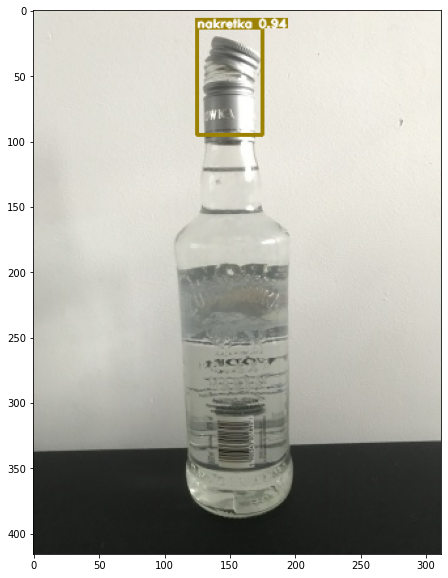

(384, 216, 3)


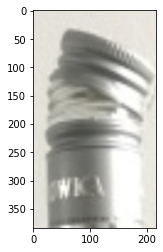

2
wada nakretki
[[0.0000000e+00 2.2583505e-08 9.9975461e-01 2.4535920e-04]]


In [115]:
check_bottle('../dataset/valid_images/IMG_8034.JPG')